# House Prices - Advanced Regression Techniques

Predict sales prices and practice feature engineering, RFs, and gradient boosting

# 0. recuperare il dataset (da internet o da locale)
# 1. feature selection (principal component analysis)
# 2. Suddivisione training e testing
# 3. Model selection con K-fold cross validation
# 4. Training (Tuning iperparametri) con k-fold cross validation
# 5. Valutare il modello con il testing set
# 6. Scegliere il metodo di score (R^2)
# 7. Fare dei grafici, vedendo anche da come li ha fatti il professore e spiegarli.
# Bagging, Boosting (Gradient Boosting) e altro

In [1]:
from code.feature_selection import FeatureSelection, FS
from code.grafici import Grafici
from code.models import Model
from code.dataset import HouseDataset
import pandas as pd

dataset = HouseDataset(preprocessing=True)
model = Model(dataset)
feature_sel = FeatureSelection(dataset.get_features(), dataset.get_target())
plot = Grafici(model)

# Preprocessing valori nulli

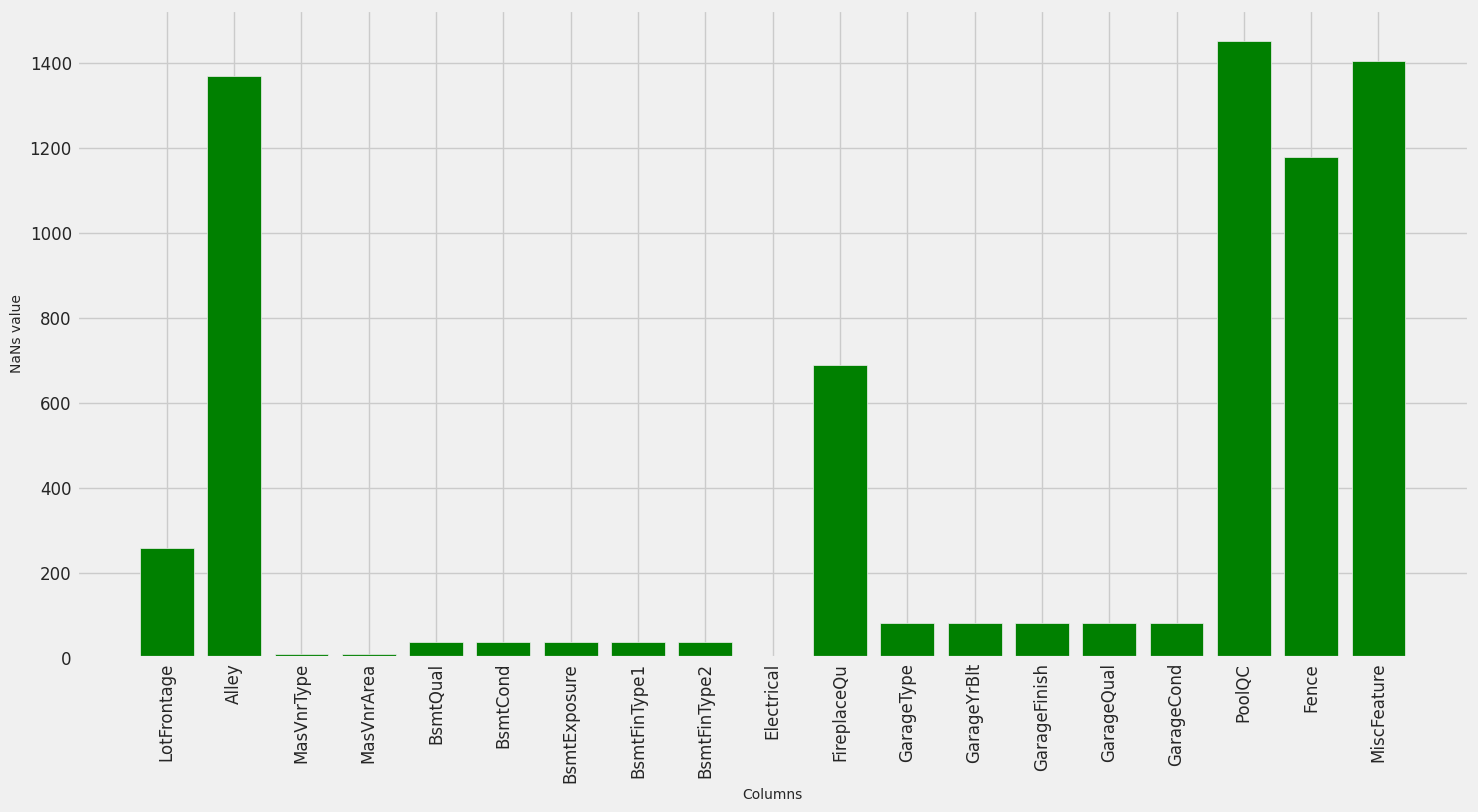

In [2]:
from code.grafici import check_nan_value

dataset_no_processing = HouseDataset(preprocessing=False)
check_nan_value(dataset_no_processing.train)

# Regressione lineare con Select-K-best

In [3]:
print("FS.SELECT_K_BEST")
model.linear_regression(FS.SELECT_K_BEST)
plot.linear_regression_plot()

FS.SELECT_K_BEST
MSE: 10 1328167577.629
MSE: 20 1182682370.373
MSE: 30 1104741330.853
MSE: 40 1012303423.130
MSE: 50 948137383.862
MSE: 60 929795932.841
MSE: 70 903007997.988
MSE: 80 857607106.758
MSE: 90 797190122.432
MSE: 100 787704351.698
MSE: 110 772329106.975
MSE: 120 735056623.905
MSE: 130 711174622.638
MSE: 140 705483536.495
MSE: 150 664240517.922
MSE: 160 660469830.745
MSE: 170 653610334.797
MSE: 180 616079715.383
MSE: 190 606956057.511
MSE: 200 600718838.307
MSE: 210 595887667.156
MSE: 220 588147771.037
MSE: 230 583057051.205
MSE: 240 577519177.476
MSE: 250 574329169.669
MSE: 260 553631853.272
MSE: 270 437722083.903


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- BsmtFinType2_GLQ
- Foundation_Wood
- GarageCond_Gd
- RoofMatl_Metal
- RoofStyle_Mansard


# Regressione lineare con Mutual Information

In [20]:
print("FS.MUTUAL_INFORMATION")
model.linear_regression(FS.MUTUAL_INFORMATION)
plot.linear_regression_plot()

FS.MUTUAL_INFORMATION


NameError: name 'FS' is not defined

# Feature Selection - Mutual Information
La Mutual Information (informazione mutua) è una metrica che viene utilizzata nell'apprendimento automatico (ML) per misurare quanto due variabili casuali sono dipendenti l'una dall'altra.

In termini matematici, la mutual information tra due variabili casuali X e Y è definita come la quantità di informazione che X fornisce su Y (o viceversa). In altre parole, la mutual information misura quanto l'incertezza di una variabile casuale diminuisce conoscendo l'altra variabile casuale.

In ML, la mutual information viene spesso utilizzata per selezionare le caratteristiche più rilevanti per una determinata attività di apprendimento. Ad esempio, quando si lavora con un insieme di dati, si può utilizzare la mutual information per valutare quanto una caratteristica specifica del dataset è rilevante per la variabile target.

In pratica, si può calcolare la mutual information tra ogni caratteristica del dataset e la variabile target e quindi selezionare le caratteristiche con la mutual information più alta.

La mutual information può anche essere utilizzata per la riduzione della dimensionalità dei dati, in modo da semplificare l'analisi e il calcolo. In questo caso, si possono selezionare solo le caratteristiche con la mutual information più alta, in modo da ridurre il numero di variabili senza perdere informazioni importanti per il modello di apprendimento automatico.

In [19]:
mi = feature_sel.mutual_information()
dmi = pd.DataFrame(mi, index=dataset.get_features().columns, columns=['mi']).sort_values(by='mi', ascending=False)
dmi.head(10)
feat = list(dmi.index[:10])
print(feat)
X = dataset.get_features()[feat].values
print(X)

['OverallQual', 'GrLivArea', 'YearBuilt', 'TotalBsmtSF', 'GarageCars', 'GarageArea', '1stFlrSF', 'GarageYrBlt', 'MSSubClass', 'FullBath']
[[7.000e+00 1.710e+03 2.003e+03 ... 2.003e+03 6.000e+01 2.000e+00]
 [6.000e+00 1.262e+03 1.976e+03 ... 1.976e+03 2.000e+01 2.000e+00]
 [7.000e+00 1.786e+03 2.001e+03 ... 2.001e+03 6.000e+01 2.000e+00]
 ...
 [7.000e+00 2.340e+03 1.941e+03 ... 1.941e+03 7.000e+01 2.000e+00]
 [5.000e+00 1.078e+03 1.950e+03 ... 1.950e+03 2.000e+01 1.000e+00]
 [5.000e+00 1.256e+03 1.965e+03 ... 1.965e+03 2.000e+01 1.000e+00]]


In [ ]:
# Lascio solo per reference
import torch
import torch.nn as nn
import numpy as np
from code.dataset import HouseDataset
from sklearn.feature_selection import SelectKBest, f_regression


# Load Boston Housing dataset
boston = HouseDataset()
X, y = boston.get_features(), boston.get_target()

# Select top 5 features using f_regression
selector = SelectKBest(f_regression, k=5)
X_new = selector.fit_transform(X, y)

# Convert data to PyTorch tensors
X_new = torch.from_numpy(X_new).float()
y = torch.from_numpy(y).float()

# Define the model
model = nn.Linear(X_new.shape[1], 1)

# Define the loss function
criterion = nn.MSELoss()

# Define the optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Train the model
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_new)
    loss = criterion(outputs, y.view(-1, 1))

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print the loss for every 100th epoch
    if (epoch+1) % 100 == 0:
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

